In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from concurrent.futures import ThreadPoolExecutor
from geopy.geocoders import Photon
import folium
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataframe_aluguel = pd.read_parquet('dados_webscraping/dataframe_imoveis_aluguel_pronto_para_analise.parquet')

print("Quantidade de imóveis: ", dataframe_aluguel.shape[0])
print("Porcentagem de informações faltantes: ")
display(round(dataframe_aluguel.isna().sum()/dataframe_aluguel.shape[0] * 100, 2).astype(str) + " %")

Quantidade de imóveis:  1448
Porcentagem de informações faltantes: 


url                         0.0 %
endereco                    0.0 %
preco                       0.0 %
area                        0.0 %
quartos                     0.0 %
vagas_de_carro              0.0 %
valor_condominio            0.0 %
iptu                        0.0 %
mobiliado                   0.0 %
piscina                     0.0 %
condominio                  0.0 %
elevador                    0.0 %
jardim                      0.0 %
quadra_esportiva            0.0 %
academia                    0.0 %
finalidade                  0.0 %
tipo                        0.0 %
localizacao                 0.0 %
latitude                    0.0 %
longitude                   0.0 %
geometry                    0.0 %
nome                       0.28 %
distancia_metro             0.0 %
distancia_escola            0.0 %
distancia_unidade_saude     0.0 %
indic_rend                 0.28 %
indic_lixo                 0.28 %
indic_esgo                 0.28 %
indic_agua                 0.28 %
dtype: object

In [4]:
dataframe_final = dataframe_aluguel.dropna()

print("Quantidade de imóveis: ", dataframe_final.shape[0])

Quantidade de imóveis:  1444


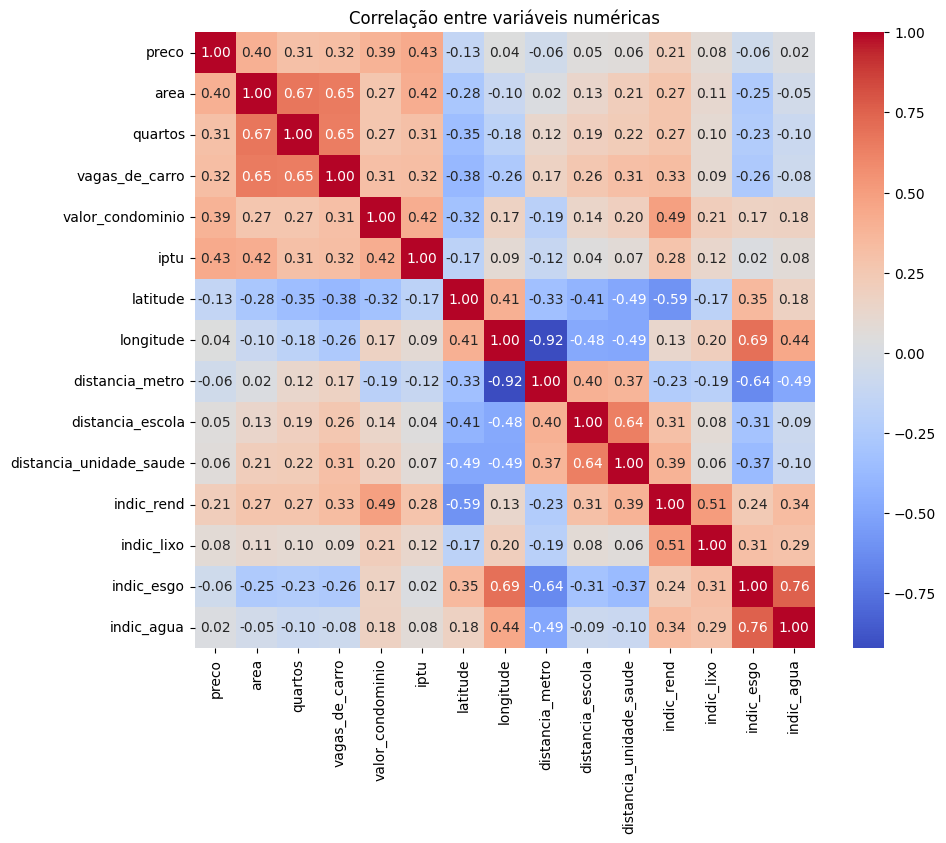

In [5]:
# Seleção de colunas numéricas
numeric_cols = dataframe_final.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
correlation_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre variáveis numéricas")
plt.show()

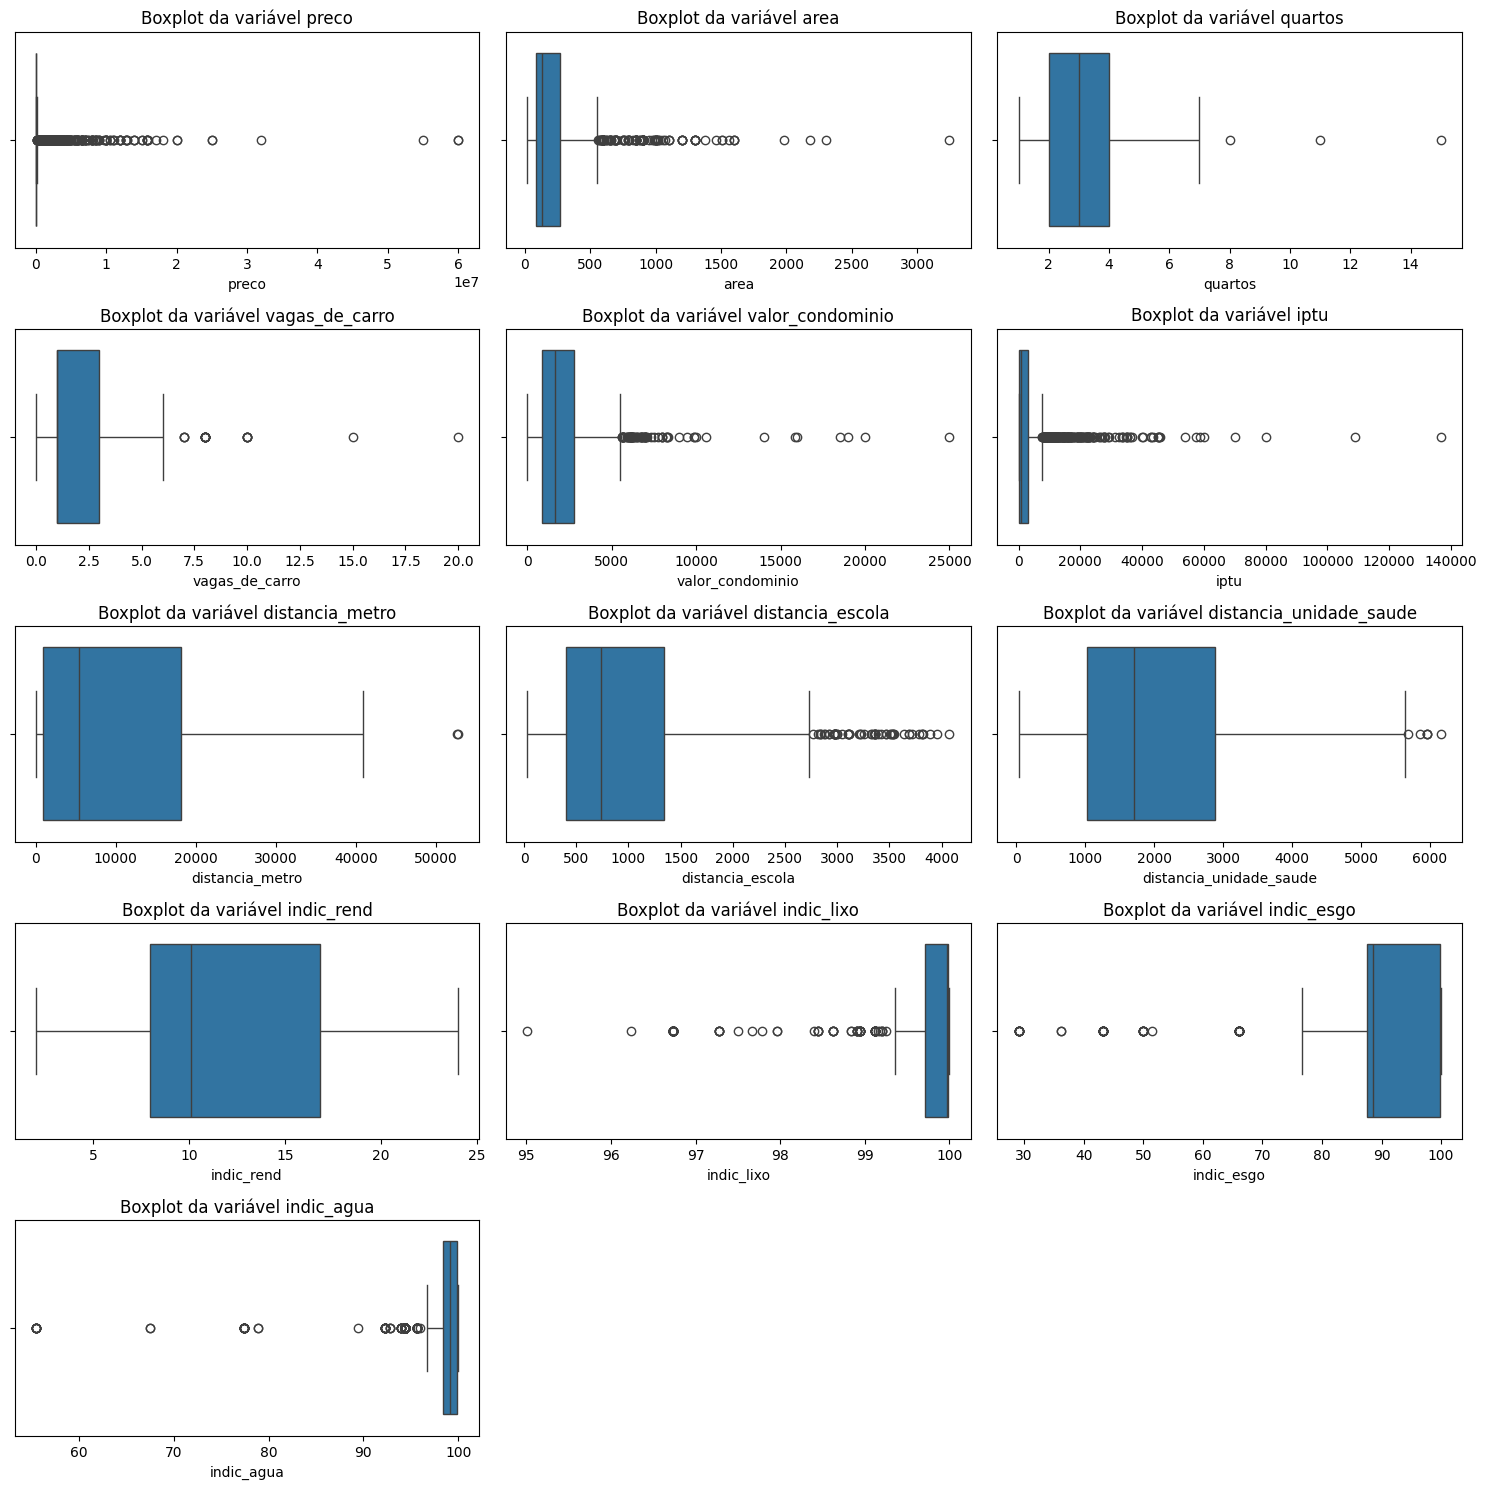

In [6]:
def plotar_boxplot(dataframe, colunas=['preco', 'area', 'quartos', 'vagas_de_carro', 'valor_condominio',
                   'iptu', 'distancia_metro', 'distancia_escola', 'distancia_unidade_saude',
                   'indic_rend', 'indic_lixo', 'indic_esgo', 'indic_agua'], tipo="boxplot"):

    # Número de colunas e linhas para subplots
    num_colunas = 3
    num_linhas = len(colunas) // num_colunas + (1 if len(colunas) % num_colunas != 0 else 0)

    # Criar os subplots
    plt.figure(figsize=(15, 3 * num_linhas))

    # Criar um boxplot para cada variável em cada subplot
    for i, coluna in enumerate(colunas):
        if tipo == "boxplot":
            plt.subplot(num_linhas, num_colunas, i + 1)
            sns.boxplot(x=dataframe[coluna])
            plt.title(f"Boxplot da variável {coluna}")
        if tipo == "histograma":
            plt.subplot(num_linhas, num_colunas, i + 1)
            sns.histplot(dataframe[coluna])
            plt.title(f"Histograma da variável {coluna}")
    
    # Ajustar o layout para não sobrepor os gráficos
    plt.tight_layout()
    plt.show()

colunas_analise = ['preco', 'area', 'quartos', 'vagas_de_carro', 'valor_condominio',
                   'iptu', 'distancia_metro', 'distancia_escola', 'distancia_unidade_saude',
                   'indic_rend', 'indic_lixo', 'indic_esgo', 'indic_agua']
plotar_boxplot(dataframe_final, colunas_analise)


(518, 29)


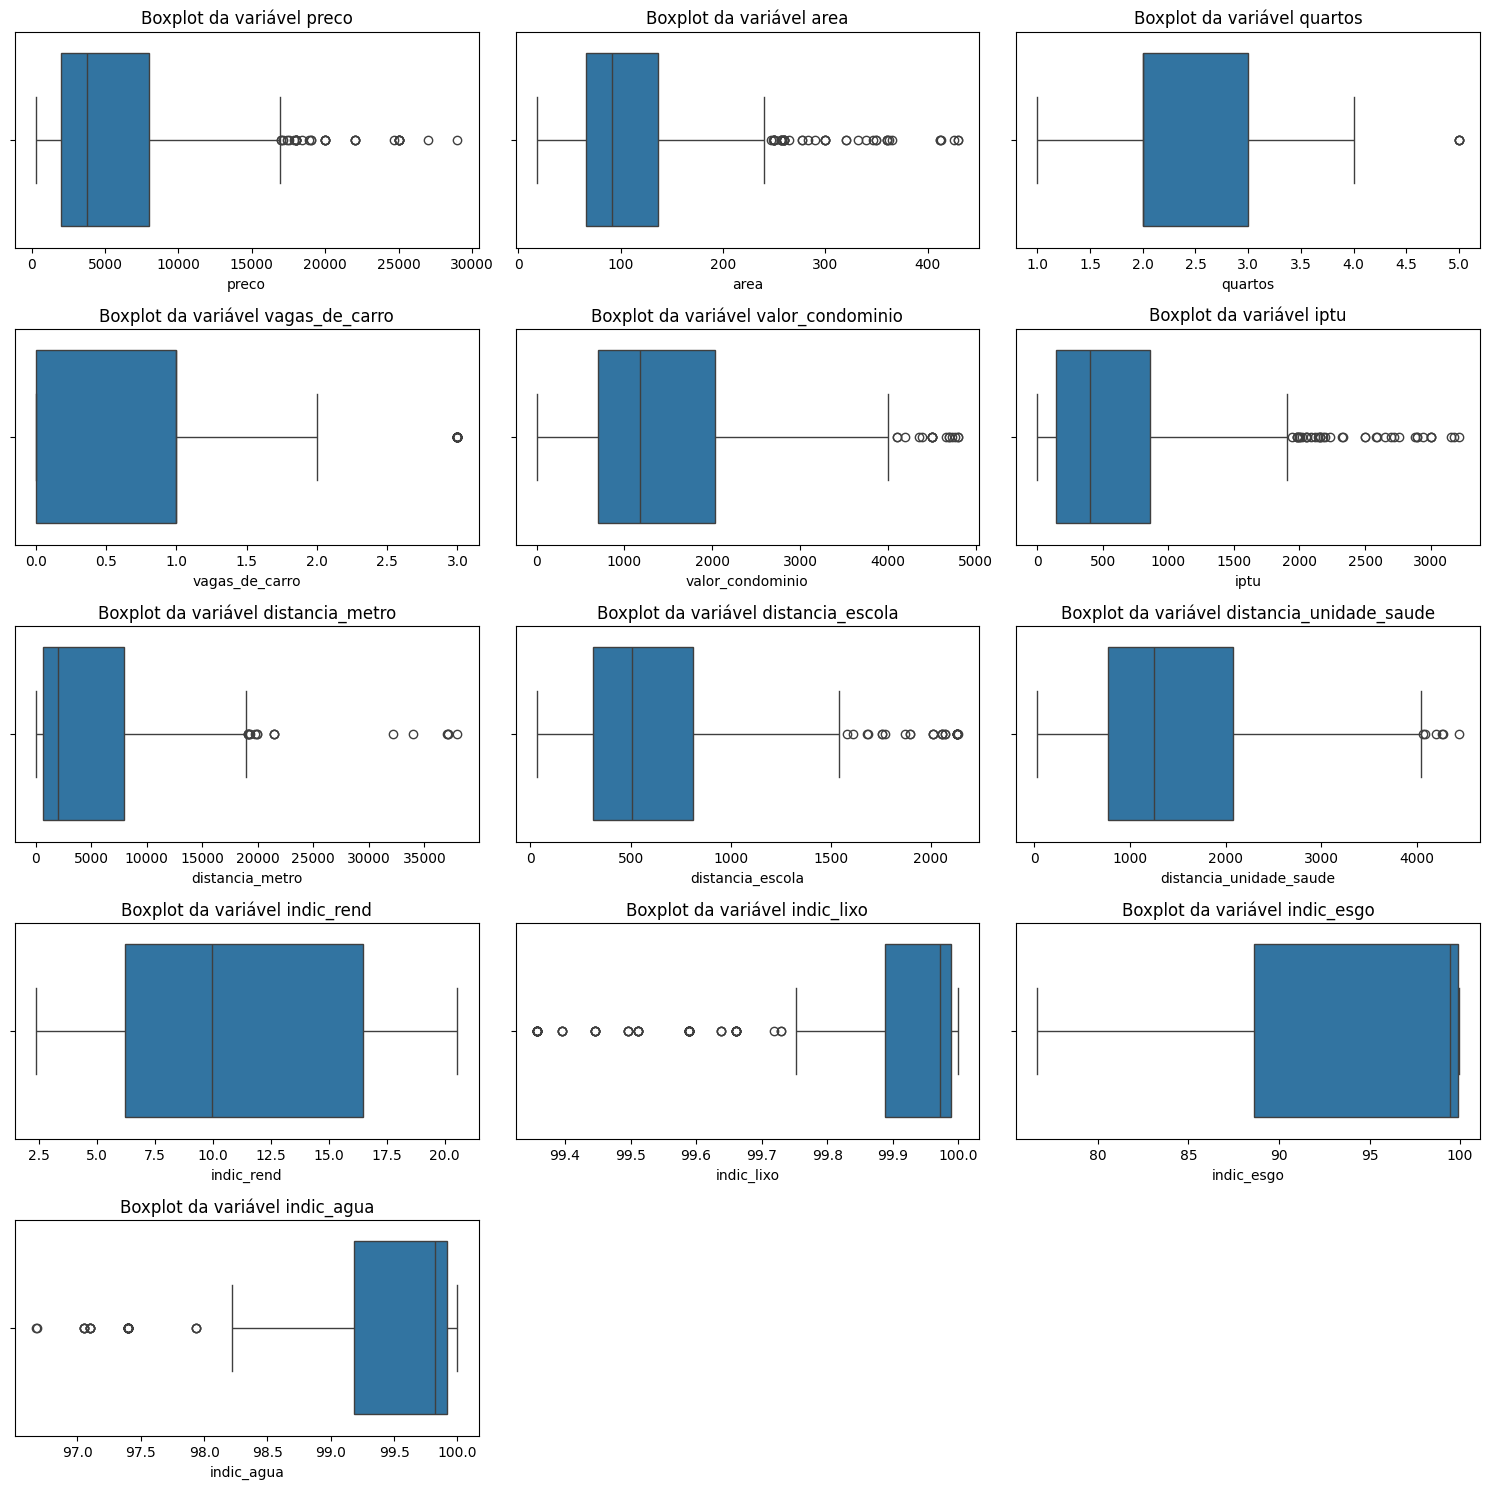

In [7]:
def identificar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Remover outliers
for coluna in colunas_analise:
    limite_inferior, limite_superior = identificar_outliers(dataframe_final, coluna)
    dataframe_final = dataframe_final[
        (dataframe_final[coluna] >= limite_inferior) & (dataframe_final[coluna] <= limite_superior)
    ]
dataframe_final = dataframe_final[dataframe_final["preco"] < 30000]

print(dataframe_final.shape)
plotar_boxplot(dataframe_final, colunas_analise)


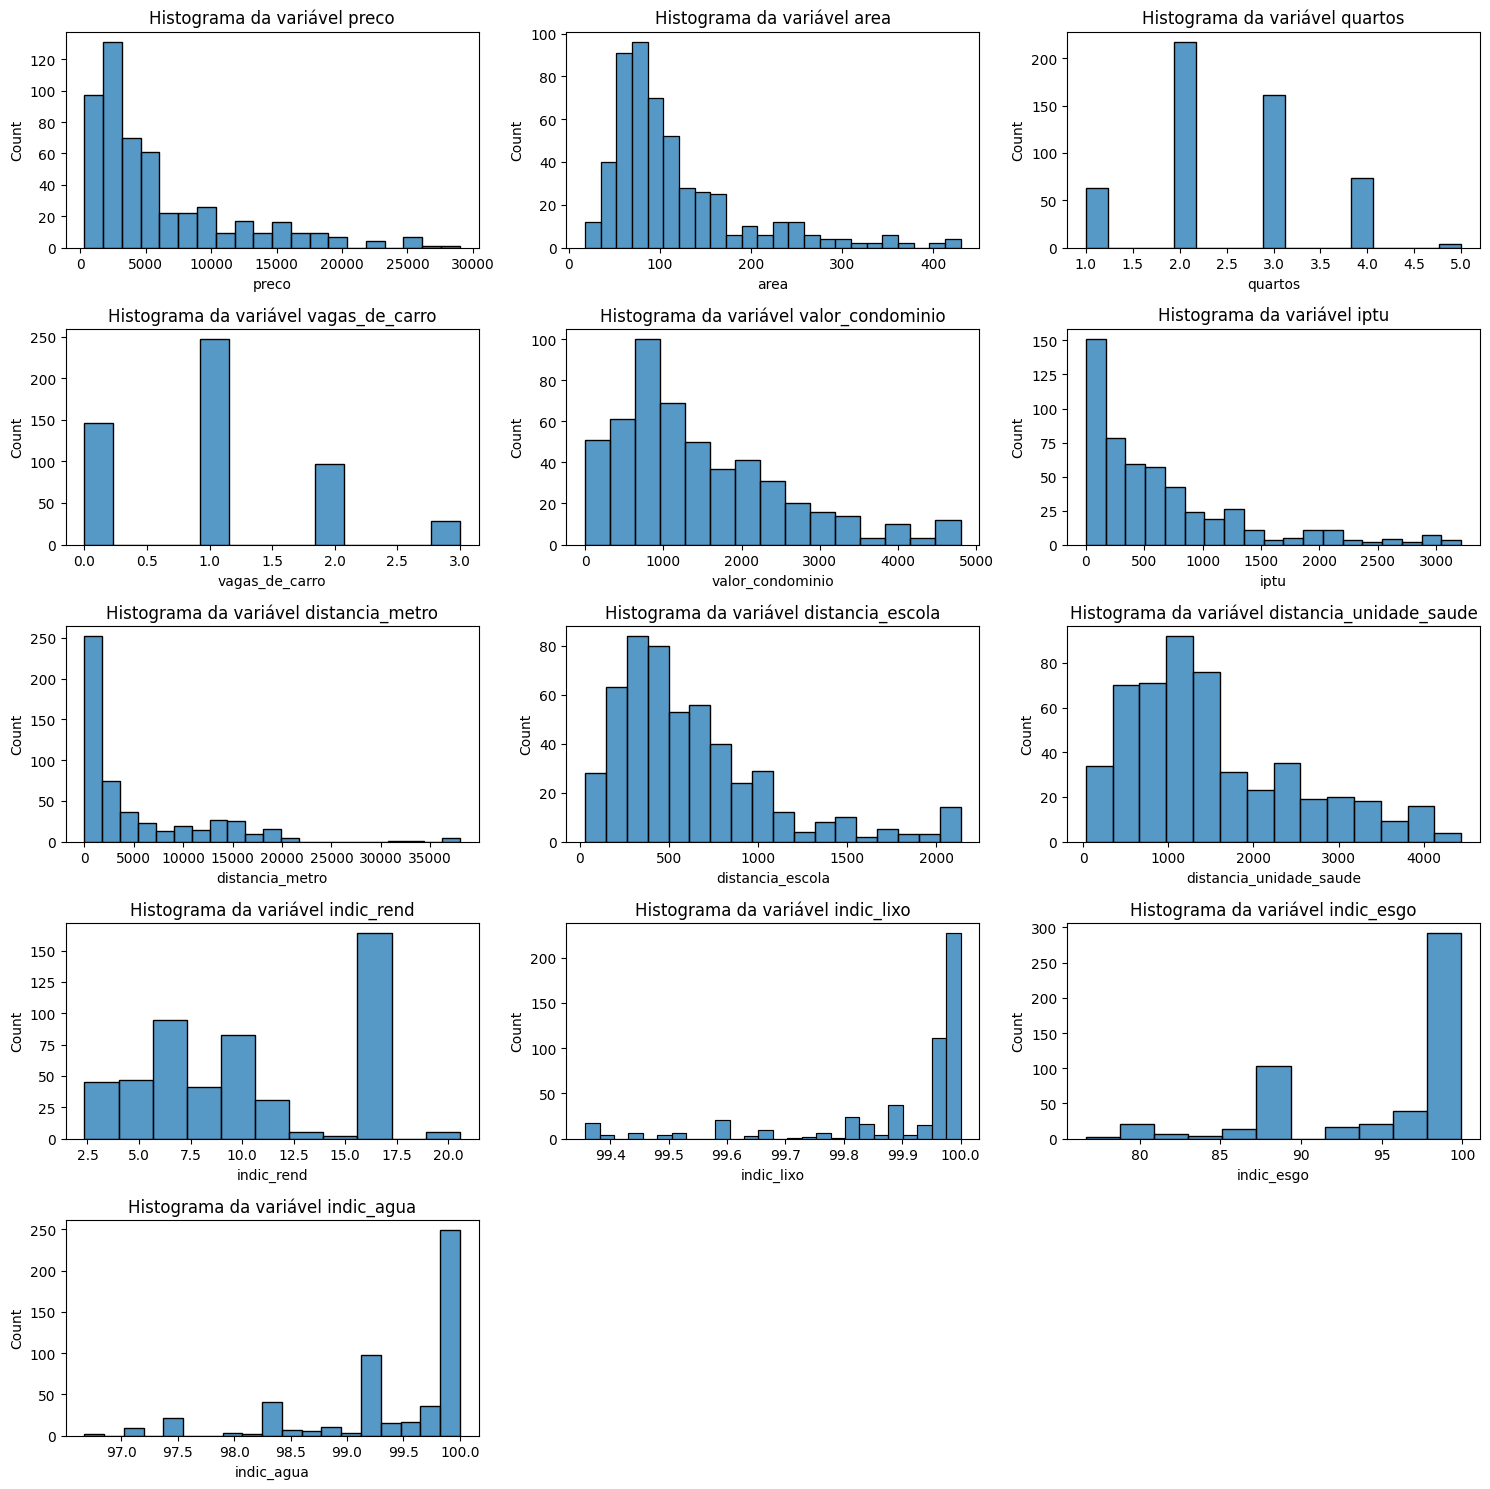

In [8]:
plotar_boxplot(dataframe_final, colunas_analise, tipo="histograma")

In [9]:
dataframe_final.to_parquet('dados_webscraping/dataframe_imoveis_aluguel_pronto_para_predicao.parquet')